<a href="https://colab.research.google.com/github/kulight/life_expectency_regression/blob/master/LifeExpectancy_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Life epectancy data exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
pd.options.display.max_columns = None
from pandas_profiling import ProfileReport

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
gpath = '/content/drive/My Drive/datasets/'

In [4]:
le = pd.read_csv(f'{gpath}Life Expectancy Data.csv')
le.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Check features and types

In [5]:
le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

## Check null values.

In [6]:
le.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

### Null values percentage from data

In [7]:
le.isnull().sum() / le.count() * 100

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.341530
Adult Mortality                     0.341530
infant deaths                       0.000000
Alcohol                             7.069971
percentage expenditure              0.000000
Hepatitis B                        23.186583
Measles                             0.000000
 BMI                                1.170799
under-five deaths                   0.000000
Polio                               0.650908
Total expenditure                   8.333333
Diphtheria                          0.650908
 HIV/AIDS                           0.000000
GDP                                17.991968
Population                         28.521435
 thinness  1-19 years               1.170799
 thinness 5-9 years                 1.170799
Income composition of resources     6.026705
Schooling                           5.873874
dtype: flo

### Population and Hepatitis B features have more than 20% of missing values. We'll drop those.

In [8]:
le.drop(['Population', 'Hepatitis B'], axis='columns', inplace=True)

## Fix column names
* Clean spaces and duplicates
* Change 'thinness_1-19_years' to 'thinness_10-19_years' according to column description

In [9]:
le.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Measles ',
       ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [10]:
le.rename(columns = lambda x: x.strip().replace(' ', '_').replace('__', '_').lower(), inplace=True)
le.rename(columns = {'thinness_1-19_years':'thinness_10-19_years'}, inplace=True)
le.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'measles', 'bmi',
       'under-five_deaths', 'polio', 'total_expenditure', 'diphtheria',
       'hiv/aids', 'gdp', 'thinness_10-19_years', 'thinness_5-9_years',
       'income_composition_of_resources', 'schooling'],
      dtype='object')

## Change labels to numeric values.

In [11]:
status_dict = {'Developing': 1, 'Developed': 2 }

In [12]:
le.loc[:, 'status'] = le['status'].map(status_dict)

### For country I'll use dummies since values wont have any meaning.

## Filling missing values

In [13]:
imputer = SimpleImputer(strategy='median')
numeric = le.drop(['country', 'status'], axis=1)
le_df = pd.DataFrame(imputer.fit_transform(numeric))
le_df = pd.concat([le[['country', 'status']], le_df] ,axis=1)
le_df.columns = ['country', 'status'] + list(numeric.columns)

In [14]:
le_df.isnull().sum()

country                            0
status                             0
year                               0
life_expectancy                    0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
percentage_expenditure             0
measles                            0
bmi                                0
under-five_deaths                  0
polio                              0
total_expenditure                  0
diphtheria                         0
hiv/aids                           0
gdp                                0
thinness_10-19_years               0
thinness_5-9_years                 0
income_composition_of_resources    0
schooling                          0
dtype: int64

## Check of year have any correlation to LE.

In [15]:
mean_le_by_year = le_df[['year', 'life_expectancy']].groupby('year').agg({'life_expectancy' : 'mean'})
mean_le_by_year.reset_index(level=0, inplace=True)

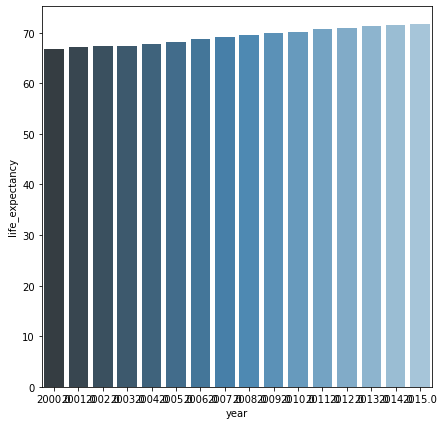

In [16]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.barplot(ax=ax, x='year', y='life_expectancy', data=mean_le_by_year, palette="Blues_d")

### It is clear that year have correlation to LE. Will encode years to have better scale.

In [17]:
year_dict = {}
for index, year in enumerate(sorted(le['year'].unique())):
    year_dict[year] = index + 1
le_df.loc[:, 'year'] = le_df['year'].map(year_dict)

## Evaluate outliers of features

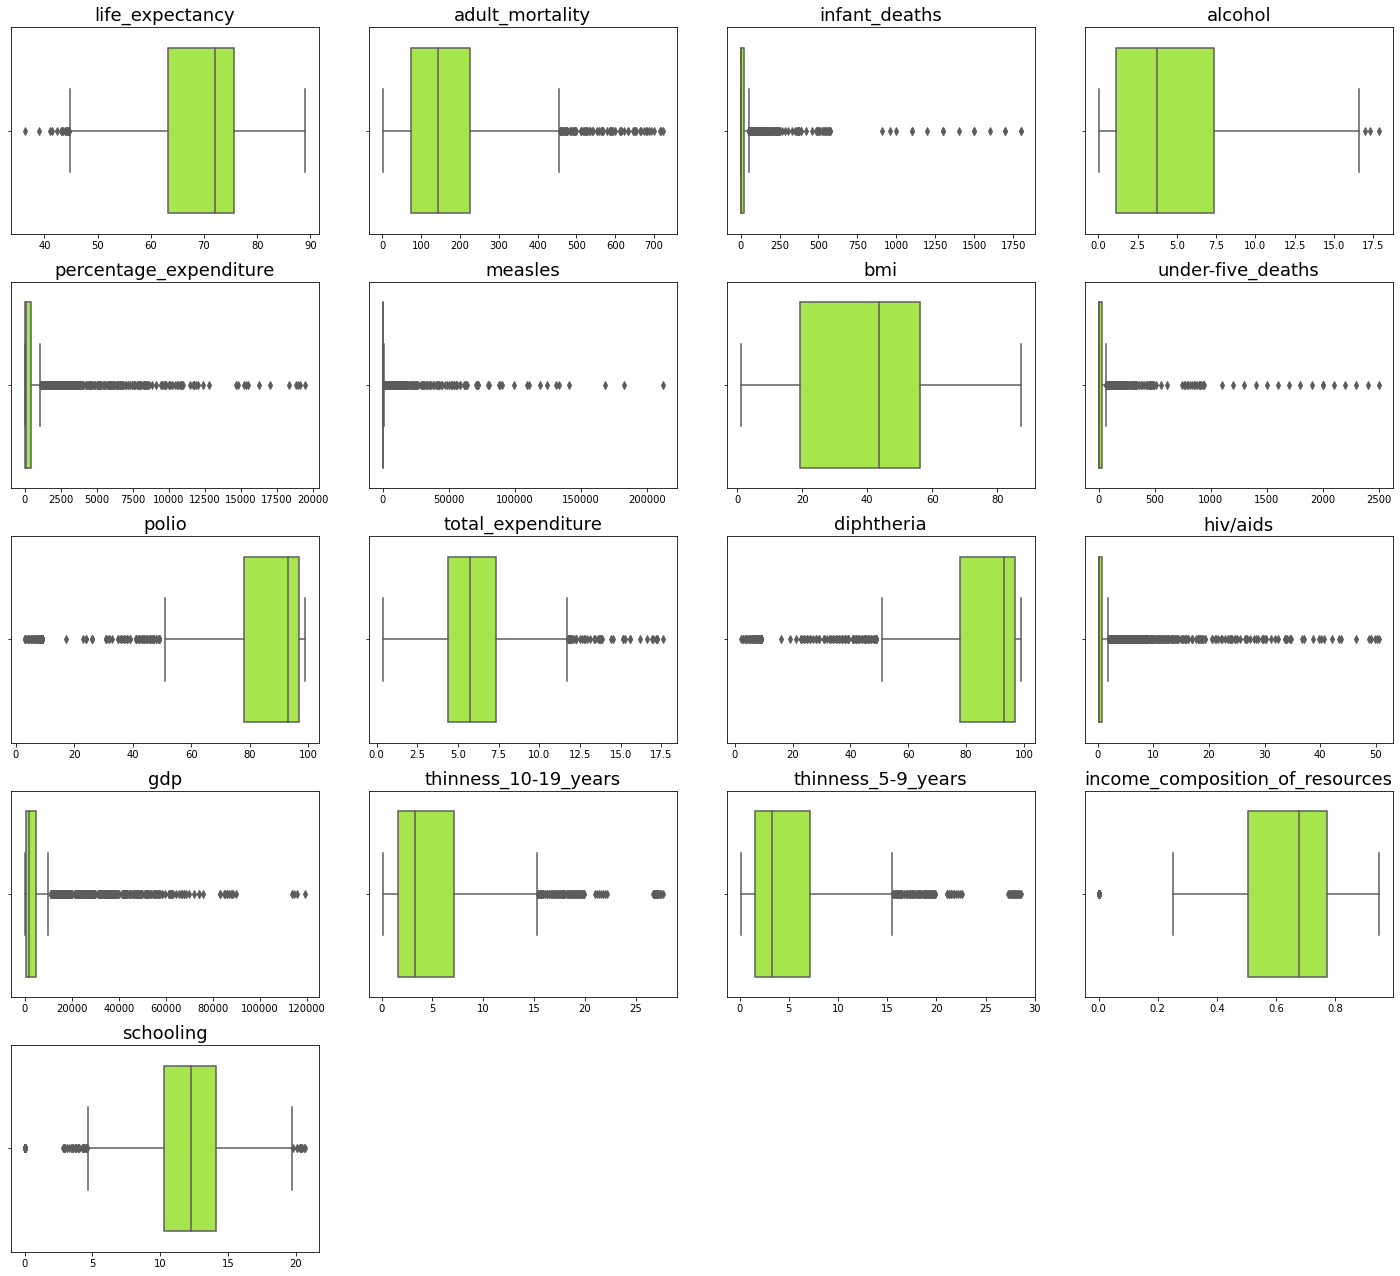

In [18]:
num_columns = ['life_expectancy', 'adult_mortality', 'infant_deaths', 'alcohol', 'percentage_expenditure', 'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure', 'diphtheria', 'hiv/aids', 'gdp', 'thinness_10-19_years', 'thinness_5-9_years', 'income_composition_of_resources', 'schooling']

plt.figure(figsize=(20,60))

for i, col in enumerate(num_columns):
    plt.subplot(len(num_columns), 4, i+1)
    sns.boxplot(le_df[col], color=('xkcd:lime'))
    plt.title(f'{col}', fontsize=18)
    plt.xlabel('')

plt.tight_layout()
plt.show()       

# Handle outliers 


 ## Columns
* Country: Country
* Year:  Year
* Status: Developed or Developing status
* Life expectancy: Life Expectancy in age
* Adult Mortality: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
* Infant deaths: Number of Infant Deaths per 1000 population
* Alcohol: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
* Percentage expenditure: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
* Hepatitis B: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
* Measles: Measles - number of reported cases per 1000 population
* BMI: Average Body Mass Index of entire population
* Under-five deaths: Number of under-five deaths per 1000 population
* Polio: Polio (Pol3) immunization coverage among 1-year-olds (%)
* Total expenditure: General government expenditure on health as a percentage of total government expenditure (%)
* Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
* HIV/AIDS: Deaths per 1 000 live births HIV/AIDS (0-4 years)
* GDP: Gross Domestic Product per capita (in USD)
* Population: Population of the country
* Thinness 1-19 years: Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
* Thinness 5-9 years: Prevalence of thinness among children for Age 5 to 9(%)
* Income composition of resources: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
* Schooling: Number of years of Schooling(years)

## Reasoning outliers
* Infant death and under-five_death data is per 1K population. It is not possoible to have more than 1K out of 1K, Drop anything above 900.
* BMI data seems to have scale error since large part of the data is over whats reasoable. Anything Above 30 is obese 40 and above that is deadly. Will scale the data.
* Percentage expenditure seems not to sclae as spending on health 20K% of GDP is not probable but large part of data is above 100%. Will scale data.

In [19]:
le_cleaned = le_df[(le_df.infant_deaths<900) & (le_df['under-five_deaths']<900)]

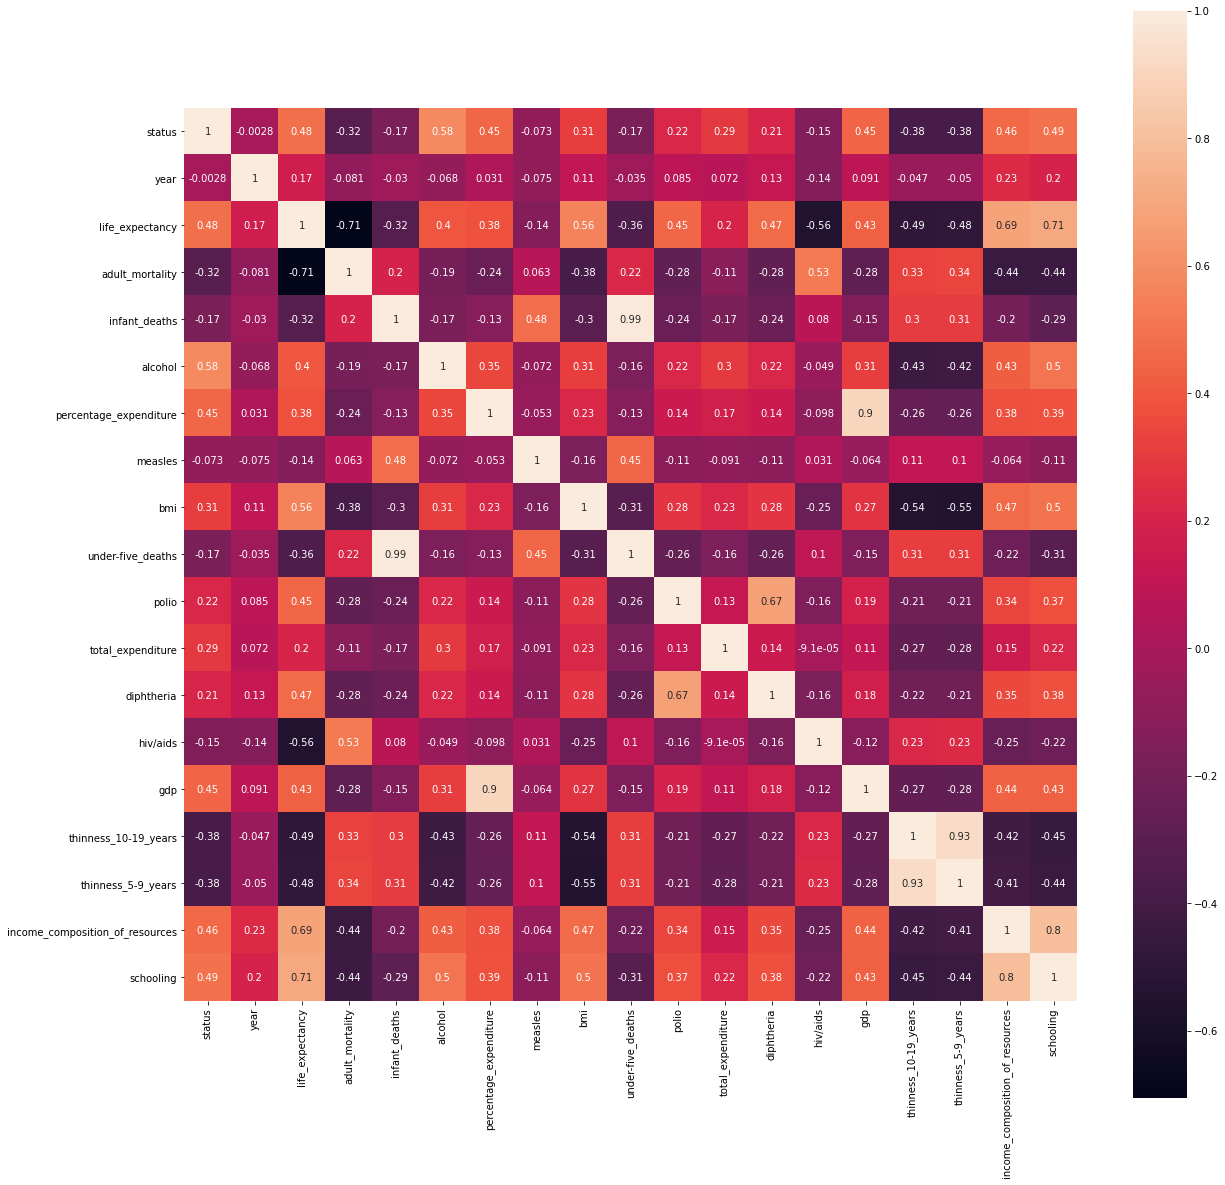

In [20]:
plt.figure(figsize=(20,20))
sns.heatmap(le_cleaned.corr(), square=True, annot=True)

## Correlations 
We have highly correlating fetures (under-five_death, infant_death), (GDP, percentage_expenditure) and (thinness_5-9_years, thinness_10-19_years).
These features may cause errors in predictions.
* Will drop percentage_expenditure since it also have strange data.
* Will drop infant_death since it is nearly identical to under_five_death.
* Will drop thinness_5-9_years as it is nearly identical to thinness_10-19_years.

In [21]:
le_cleaned.drop(['percentage_expenditure', 'infant_deaths', 'thinness_5-9_years'], axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


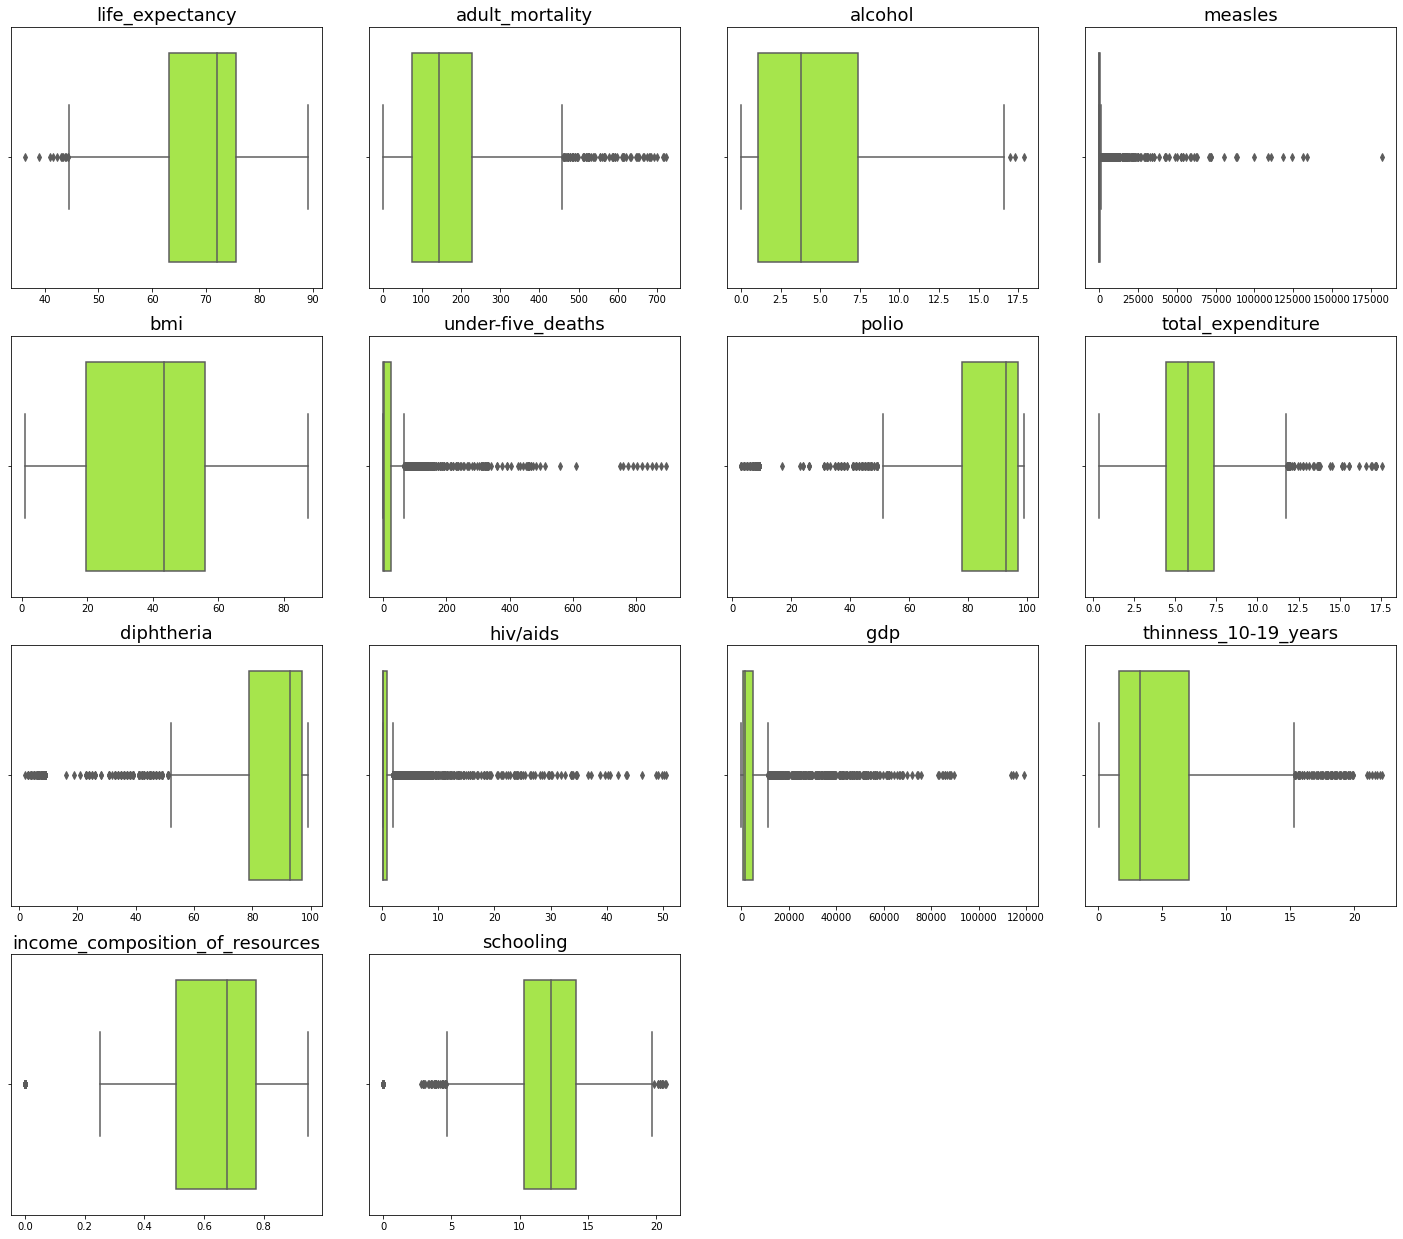

In [22]:
num_columns = [col for col in num_columns if col not in ['percentage_expenditure', 'infant_deaths', 'thinness_5-9_years']]

plt.figure(figsize=(20,60))

for i, col in enumerate(num_columns):
    plt.subplot(len(num_columns), 4, i+1)
    sns.boxplot(le_cleaned[col], color=('xkcd:lime'))
    plt.title(f'{col}', fontsize=18)
    plt.xlabel('')

plt.tight_layout()
plt.show()

# Prepering some interesting visualization of data

In [23]:
ISOs_Country = {
'ABW':'Aruba', 'AFG':'Afghanistan','AGO':'Angola','AIA':'Anguilla','ALA':'Åland Islands','ALB':'Albania',
'AND':'Andorra','ARE':'United Arab Emirates','ARG':'Argentina','ARM':'Armenia','ASM':'American Samoa',
'ATA':'Antarctica','ATF':'French Southern Territories','ATG':'Antigua and Barbuda','AUS':'Australia',
'AUT':'Austria','AZE':'Azerbaijan','BDI':'Burundi','BEL':'Belgium','BEN':'Benin',
'BES':'Bonaire, Sint Eustatius and Saba','BFA':'Burkina Faso','BGD':'Bangladesh','BGR':'Bulgaria',
'BHR':'Bahrain','BHS':'Bahamas','BIH':'Bosnia and Herzegovina','BLM':'Saint Barthélemy','BLR':'Belarus',
'BLZ':'Belize','BMU':'Bermuda','BOL':'Bolivia (Plurinational State of)','BRA':'Brazil','BRB':'Barbados',
'BRN':'Brunei Darussalam','BTN':'Bhutan','BVT':'Bouvet Island','BWA':'Botswana','CAF':'Central African Republic',
'CAN':'Canada','CCK':'Cocos (Keeling) Islands','CHE':'Switzerland','CHL':'Chile','CHN':'China',
'CIV':'Côte d\'Ivoire','CMR':'Cameroon','COD':'Democratic Republic of the Congo','COG':'Congo',
'COK':'Cook Islands','COL':'Colombia','COM':'Comoros','CPV':'Cabo Verde','CRI':'Costa Rica','CUB':'Cuba',
'CUW':'Curaçao','CXR':'Christmas Island','CYM':'Cayman Islands','CYP':'Cyprus','CZE':'Czechia',
'DEU':'Germany','DJI':'Djibouti','DMA':'Dominica','DNK':'Denmark','DOM':'Dominican Republic','DZA':'Algeria',
'ECU':'Ecuador','EGY':'Egypt','ERI':'Eritrea','ESH':'Western Sahara','ESP':'Spain','EST':'Estonia',
'ETH':'Ethiopia','FIN':'Finland','FJI':'Fiji','FLK':'Falkland Islands (Malvinas)','FRA':'France',
'FRO':'Faroe Islands','FSM':'Micronesia (Federated States of)','GAB':'Gabon',
'GBR':'United Kingdom of Great Britain and Northern Ireland','GEO':'Georgia','GGY':'Guernsey','GHA':'Ghana',
'GIB':'Gibraltar','GIN':'Guinea','GLP':'Guadeloupe','GMB':'Gambia','GNB':'Guinea-Bissau',
'GNQ':'Equatorial Guinea','GRC':'Greece','GRD':'Grenada','GRL':'Greenland','GTM':'Guatemala',
'GUF':'French Guiana','GUM':'Guam','GUY':'Guyana','HKG':'Hong Kong','HMD':'Heard Island and McDonald Islands',
'HND':'Honduras','HRV':'Croatia','HTI':'Haiti','HUN':'Hungary','IDN':'Indonesia','IMN':'Isle of Man',
'IND':'India','IOT':'British Indian Ocean Territory','IRL':'Ireland','IRN':'Iran (Islamic Republic of)',
'IRQ':'Iraq','ISL':'Iceland','ISR':'Israel','ITA':'Italy','JAM':'Jamaica','JEY':'Jersey','JOR':'Jordan',
'JPN':'Japan','KAZ':'Kazakhstan','KEN':'Kenya','KGZ':'Kyrgyzstan','KHM':'Cambodia','KIR':'Kiribati',
'KNA':'Saint Kitts and Nevis','KOR':'Republic of Korea','KWT':'Kuwait','LAO':'Lao People\'s Democratic Republic',
'LBN':'Lebanon','LBR':'Liberia','LBY':'Libya','LCA':'Saint Lucia', 'LIE':'Liechtenstein','LKA':'Sri Lanka',
'LSO':'Lesotho','LTU':'Lithuania','LUX':'Luxembourg','LVA':'Latvia','MAC':'Macao',
'MAF':'Saint Martin (French part)','MAR':'Morocco','MCO':'Monaco','MDA':'Republic of Moldova',
'MDG':'Madagascar','MDV':'Maldives','MEX':'Mexico','MHL':'Marshall Islands','MKD':'North Macedonia',
'MLI':'Mali','MLT':'Malta','MMR':'Myanmar','MNE':'Montenegro','MNG':'Mongolia','MNP':'Northern Mariana Islands',
'MOZ':'Mozambique','MRT':'Mauritania','MSR':'Montserrat','MTQ':'Martinique','MUS':'Mauritius','MWI':'Malawi',
'MYS':'Malaysia','MYT':'Mayotte','NAM':'Namibia','NCL':'New Caledonia','NER':'Niger','NFK':'Norfolk Island',
'NGA':'Nigeria','NIC':'Nicaragua','NIU':'Niue','NLD':'Netherlands','NOR':'Norway','NPL':'Nepal','NRU':'Nauru',
'NZL':'New Zealand','OMN':'Oman','PAK':'Pakistan','PAN':'Panama','PCN':'Pitcairn','PER':'Peru','PHL':'Philippines',
'PLW':'Palau','PNG':'Papua New Guinea','POL':'Poland','PRI':'Puerto Rico','PRK':'Democratic People\'s Republic of Korea',
'PRT':'Portugal','PRY':'Paraguay','PSE':'Palestine, State of','PYF':'French Polynesia','QAT':'Qatar','REU':'Réunion',
'ROU':'Romania','RUS':'Russian Federation','RWA':'Rwanda','SAU':'Saudi Arabia','SDN':'Sudan','SEN':'Senegal',
'SGP':'Singapore','SGS':'South Georgia and the South Sandwich Islands','SHN':'Saint Helena, Ascension and Tristan da Cunha',
'SJM':'Svalbard and Jan Mayen','SLB':'Solomon Islands','SLE':'Sierra Leone','SLV':'El Salvador','SMR':'San Marino',
'SOM':'Somalia','SPM':'Saint Pierre and Miquelon','SRB':'Serbia','SSD':'South Sudan','STP':'Sao Tome and Principe',
'SUR':'Suriname','SVK':'Slovakia','SVN':'Slovenia','SWE':'Sweden','SWZ':'Eswatini','SXM':'Sint Maarten (Dutch part)',
'SYC':'Seychelles','SYR':'Syrian Arab Republic','TCA':'Turks and Caicos Islands','TCD':'Chad','TGO':'Togo',
'THA':'Thailand','TJK':'Tajikistan','TKL':'Tokelau','TKM':'Turkmenistan','TLS':'Timor-Leste','TON':'Tonga',
'TTO':'Trinidad and Tobago','TUN':'Tunisia','TUR':'Turkey','TUV':'Tuvalu','TWN':'Taiwan, Province of China',
'TZA':'United Republic of Tanzania','UGA':'Uganda','UKR':'Ukraine','UMI':'United States Minor Outlying Islands',
'URY':'Uruguay','USA':'United States of America','UZB':'Uzbekistan','VAT':'Holy See','VCT':'Saint Vincent and the Grenadines',
'VEN':'Venezuela (Bolivarian Republic of)','VGB':'Virgin Islands (British)','VIR':'Virgin Islands (U.S.)','VNM':'Viet Nam',
'VUT':'Vanuatu','WLF':'Wallis and Futuna','WSM':'Samoa','YEM':'Yemen','ZAF':'South Africa','ZMB':'Zambia',
'ZWE':'Zimbabwe'}

In [24]:
ISO_df = pd.DataFrame.from_dict(ISOs_Country, orient='index', columns=['country'])
ISO_df.head()

,country
ABW,Aruba
AFG,Afghanistan
AGO,Angola
AIA,Anguilla
ALA,Åland Islands


In [25]:
grp_le_df = le_cleaned.groupby('country')['life_expectancy', 'status', 'income_composition_of_resources', 'schooling'].agg({'life_expectancy':'mean', 'status':'min', 'income_composition_of_resources':'mean', 'schooling':'mean'}) 
# grp_le_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [26]:
merged = pd.merge(grp_le_df, ISO_df, left_index=True, right_on='country')
merged.head()

,life_expectancy,status,income_composition_of_resources,schooling,country
AFG,58.19375,1,0.415375,8.21250,Afghanistan
ALB,75.15625,1,0.709875,12.13750,Albania
DZA,73.61875,1,0.694875,12.71250,Algeria
AGO,49.01875,1,0.458375,8.04375,Angola
ATG,75.05625,1,0.488625,8.84375,Antigua and Barbuda


In [27]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=4, cols=1,
    row_heights=[0.25, 0.25, 0.25, 0.25],
    vertical_spacing=0.025,
    subplot_titles=("World Life Expectancy", "status", "Income Composition of Resources", "Highest Average Age of schooling"),
    specs=[[{"type": "Choropleth", "rowspan": 1}],
           [{"type": "Choropleth", "rowspan": 1}],
           [{"type": "Choropleth", "rowspan": 1}],
           [{"type": "Choropleth", "rowspan": 1}]])

fig.add_trace( # Life Expectancy
    go.Choropleth(locations = merged.index,
                  z= merged['life_expectancy'], 
                  text=merged['country'],
                  name='Life Expectancy',
                  colorbar={'title':'Life<br>Expectancy', 'len':.25, 'x':.99,'y':.896},
                  colorscale='spectral',),
    row=1,col=1
)

fig.add_trace( #Status
    go.Choropleth(locations = merged.index,
                  z= merged['status'], 
                  text=merged['country'],
                  name='Status of Countries',
                  colorbar={'len':.227, 'x':.99,'y':.629, 'tickmode':'array','nticks':2,
                           'tickvals':[1,2], 'ticktext':('Developing', 'Developed')},
                  colorscale='burgyl_r'),
    row=2,col=1
)

fig.add_trace( # Income Comp
    go.Choropleth(locations = merged.index,
                  z= merged['income_composition_of_resources'], 
                  text=merged['country'],
                  name='Income Composition of Resources',
                  colorbar={'title':'Index', 'len':.24, 'x':.99,'y':.378},
                  colorscale='bluered',),
    row=3,col=1
)

fig.add_trace( #Schooling
    go.Choropleth(locations = merged.index,
                  z= merged['schooling'], 
                  text=merged['country'],
                  name='Highest Average Age of Schooling',
                  colorbar={'len':.248, 'x':.99,'y':.1275, 'title':'Schooling<br>Age'},
                  colorscale='burgyl_r'),
    row=4,col=1
)

fig.update_layout(
    margin=dict(r=1, t=30, b=10, l=30),
    width=700,
    height=1400,
)

fig.show()

## It is noticeable that some countries have wrong lable of developing. I will correct those.

In [28]:
for country in ['Canada', 'Chile', 'Greece', 'Finland', 'France', 'Israel', 'Republic of Korea']:
    le_cleaned['status'].loc[le_cleaned.country == country] = 2
    merged['status'].loc[merged.country == country] = 2

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [29]:
data = [go.Choropleth(locations = merged.index,
                  z= merged['status'], 
                  text=merged['country'],
                  name='Status of Countries',
                  colorbar={'len':.227, 'x':.99,'y':.629, 'tickmode':'array','nticks':2,
                           'tickvals':[1,2], 'ticktext':('Developing', 'Developed')},
                  colorscale='burgyl_r')]

fig = go.Figure(data)
fig.show()

In [30]:
le_cleaned.to_csv('Cleaned Life Expectancy Data.csv', index=False)